In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1])

In [3]:
#data.head()

In [4]:
ratings = data['text'].str.extract(r'(\d+(\.\d+)?)/10', expand=False)  #extract ratings from the 'text' column
#ratings.head()

In [5]:
data.insert(3, 'rating', ratings[0])      #insert ratings data into new column named 'rating'
#data.head()

In [6]:
data['rating'] = pd.to_numeric(data['rating'])                    #convert column values to numerical
clean_data = data.dropna(axis=0, how='any', subset=['rating'])    #drop rows containing 'NaN'
#clean_data.head()

In [7]:
#clean_data['rating'].value_counts()       #counts of unique values in the 'rating' column

In [8]:
filtered_data = clean_data[clean_data['rating'] < 20]       #only keep ratings under 20

In [9]:
#filtered_data['rating'].value_counts()

In [10]:
def to_timestamp(x):         #function to convert datetime objects to numbers so that regression line calc. later
    return x.timestamp()

In [11]:
filtered_data['timestamp'] = filtered_data['created_at'].apply(to_timestamp)
#filtered_data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
regression_line = stats.linregress(filtered_data['timestamp'], filtered_data['rating'])    #calculates regression line

In [13]:
y_vals = (regression_line.slope*filtered_data['timestamp']) + regression_line.intercept      
#determine y-values from the eqn of best-fit line y=mx+b

In [14]:
filtered_data.insert(5, 'prediction', y_vals)
filtered_data.head()

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,b'This is Louie. He has misplaced his Cheerio....,14.0,1.525910e+09,13.706036
7,993889039714578432,2018-05-08 16:23:07,b'This is Manny. He hasn\xe2\x80\x99t seen you...,13.0,1.525797e+09,13.700870
8,993629544463642624,2018-05-07 23:11:58,b'This is Libby. She leap. 14/10\n(IG: libbyth...,14.0,1.525735e+09,13.698046
24,992198572664860672,2018-05-04 00:25:48,b'This is Rosie. She thought Coachella was thi...,13.0,1.525394e+09,13.682471
30,991744041351090177,2018-05-02 18:19:39,b'This is Riley. He\xe2\x80\x99ll be your chau...,13.0,1.525285e+09,13.677524


In [15]:
regression_line.slope, regression_line.intercept

(4.565094136688219e-08, -55.95318015002792)

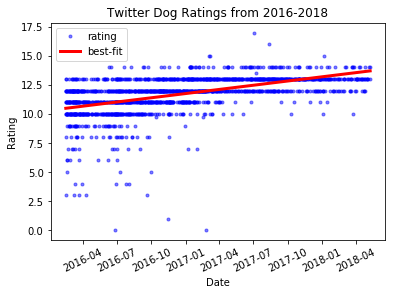

In [16]:
plt.xticks(rotation=25)
plt.plot(filtered_data.created_at, filtered_data.rating,'b.', alpha=0.5)
plt.plot(filtered_data.created_at, y_vals,'r-', linewidth=3)
plt.title('Twitter Dog Ratings from 2016-2018')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend(('rating', 'best-fit'))
# plt.show()
plt.savefig('ratingsTrend.png')

In [17]:
freqData = filtered_data[['rating']].groupby(['rating']).size().reset_index(name='counts')
freqData

,rating,counts
0,0.00,2
1,1.00,1
2,3.00,5
3,4.00,5
4,5.00,3
5,6.00,7
6,7.00,12
7,8.00,23
8,9.00,35
9,9.75,2


TypeError: object of type 'int' has no len()

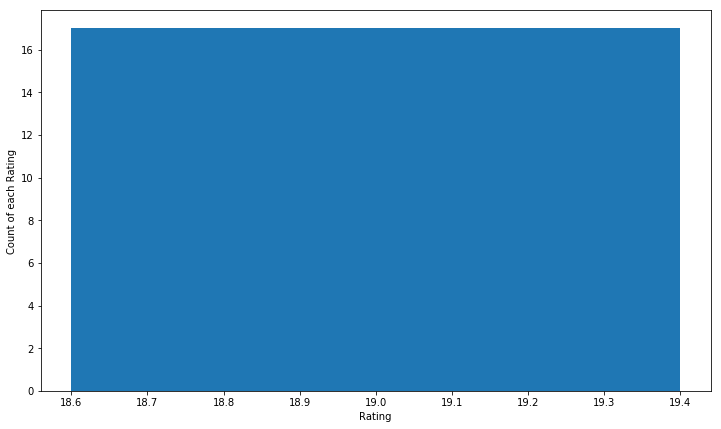

In [18]:
plt.figure(figsize=(12,7))
plt.bar(19, freqData.rating)
plt.xlabel('Rating', fontsize=10)
plt.ylabel('Count of each Rating', fontsize=10)
plt.xticks(19, freqData.counts, fontsize=7, rotation=30)
plt.title('Frequency of Ratings')
plt.show()